### PSK Modulation and Demodulation
#### Theory
Phase Shift Keying (PSK) is a digital modulation technique where the phase of a carrier signal is varied in accordance with the digital data being transmitted. It is widely used in communication systems due to its robustness against noise and efficient bandwidth utilization. In PSK, the carrier signal's phase is shifted to represent binary data, typically using two distinct phases for binary '0' and '1'. This technique is commonly referred to as Binary Phase Shift Keying (BPSK). The demodulation process involves extracting the original digital data from the modulated signal by comparing the received signal's phase with a reference signal.

#### Objective
The objective of this lab is to:
1. Understand the principles of digital modulation and demodulation using Phase Shift Keying (PSK).
2. Implement the PSK modulation and demodulation process in Python.
3. Visualize the digital signal, modulated signal, and demodulated signal to analyze the effectiveness of the modulation technique.
4. Gain hands-on experience with signal processing concepts such as carrier signals, phase shifts, and signal reconstruction.

In [58]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
def unipolar_nrz(data, sampling_rate: int = 100, duration: float = 1.0):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start:end] = bit
    return time, signal

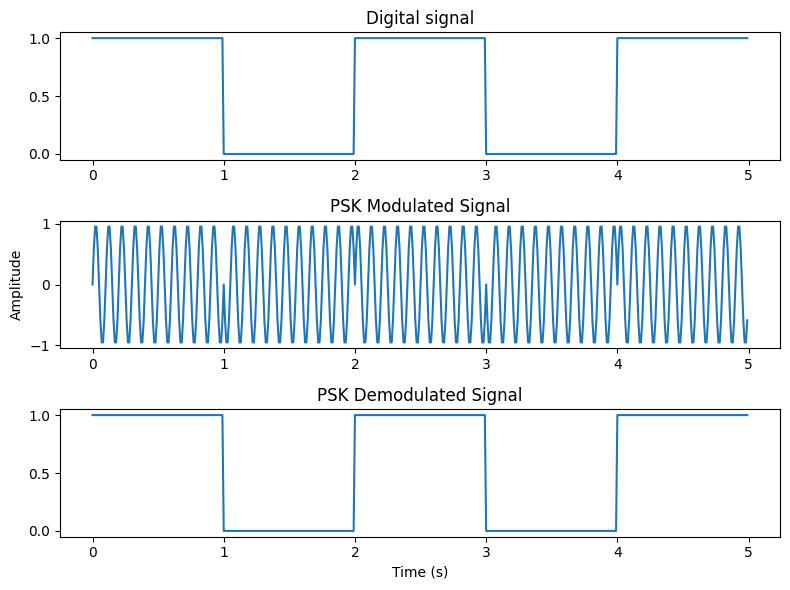

In [60]:
data = np.random.randint(0, 2, 5)
sampling_rate, duration = 100, 1
time, dsignal = unipolar_nrz(data, sampling_rate, duration)

segment_time = time[0:sampling_rate]
segment_f1 = np.sin(2 * np.pi * 10 * segment_time)
segment_f0 = np.sin(2 * np.pi * 10 * segment_time + np.pi)

modulated_signal = np.zeros_like(dsignal)
for i in range(0, len(dsignal), sampling_rate):
    time_segment = time[i : i + sampling_rate]
    modulated_signal[i : i + sampling_rate] = segment_f1 if dsignal[i] == 1 else segment_f0

demodulated_signal = np.zeros_like(dsignal)
for i in range(0, len(modulated_signal), sampling_rate):
    segment = modulated_signal[i : i + sampling_rate]
    mean = np.mean(segment)
    mean_after = np.mean(segment * segment_f1)
    demodulated_signal[i : i + sampling_rate] = 1 if mean_after > mean else 0

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(time, dsignal)
plt.title("Digital signal")

plt.subplot(3, 1, 2)
plt.plot(time, modulated_signal)
plt.title("PSK Modulated Signal")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(time, demodulated_signal)
plt.title("PSK Demodulated Signal")
plt.xlabel("Time (s)")

plt.tight_layout()